In [1]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [3]:
with open('/content/DeteksiSarkasme.json', 'r') as f:
    tf_data = [json.loads(line) for line in f]

In [4]:
tf_texts = [item['headline'] for item in tf_data]
tf_labels = [item['is_sarcastic'] for item in tf_data]

In [5]:
tf_tokenizer = Tokenizer(oov_token="<OOV>")
tf_tokenizer.fit_on_texts(tf_texts)
tf_sequences = tf_tokenizer.texts_to_sequences(tf_texts)
tf_padded = pad_sequences(tf_sequences, padding='post', maxlen=40)

In [6]:
tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(tf_padded, tf_labels, test_size=0.2, random_state=42)

In [8]:
tf_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tf_tokenizer.word_index)+1, output_dim=64, input_length=40),
    tf.keras.layers.SimpleRNN(64),  # Ini dia layer RNN-nya
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

tf_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
tf_model.build(input_shape=(None, 40))
tf_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 40, 64)         │     1,898,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,908,481 (7.28 MB)

 Trainable params: 1,908,481 (7.28 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
import numpy as np

tf_y_train = np.array(tf_y_train)
tf_y_test = np.array(tf_y_test)

tf_history = tf_model.fit(tf_X_train, tf_y_train, epochs=5, validation_data=(tf_X_test, tf_y_test), batch_size=64)

Epoch 1/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7189 - loss: 0.5363 - val_accuracy: 0.8508 - val_loss: 0.3453
Epoch 2/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9402 - loss: 0.1629 - val_accuracy: 0.8583 - val_loss: 0.3910
Epoch 3/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9841 - loss: 0.0470 - val_accuracy: 0.8517 - val_loss: 0.5108
Epoch 4/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9921 - loss: 0.0236 - val_accuracy: 0.8403 - val_loss: 0.6387
Epoch 5/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9957 - loss: 0.0141 - val_accuracy: 0.8244 - val_loss: 0.6958


In [13]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi probabilitas dan konversi ke label
tf_y_pred_probs = tf_model.predict(tf_X_test)
tf_y_pred = (tf_y_pred_probs > 0.5).astype(int).flatten()

# Metrik evaluasi
tf_acc = accuracy_score(tf_y_test, tf_y_pred)
tf_prec = precision_score(tf_y_test, tf_y_pred)
tf_rec = recall_score(tf_y_test, tf_y_pred)
tf_f1 = f1_score(tf_y_test, tf_y_pred)
tf_auc = roc_auc_score(tf_y_test, tf_y_pred_probs)

print(f"[TensorFlow] Accuracy: {tf_acc:.4f}")
print(f"[TensorFlow] Precision: {tf_prec:.4f}")
print(f"[TensorFlow] Recall: {tf_rec:.4f}")
print(f"[TensorFlow] F1 Score: {tf_f1:.4f}")
print(f"[TensorFlow] AUC: {tf_auc:.4f}")

167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
[TensorFlow] Accuracy: 0.8244
[TensorFlow] Precision: 0.8349
[TensorFlow] Recall: 0.7481
[TensorFlow] F1 Score: 0.7891
[TensorFlow] AUC: 0.9013


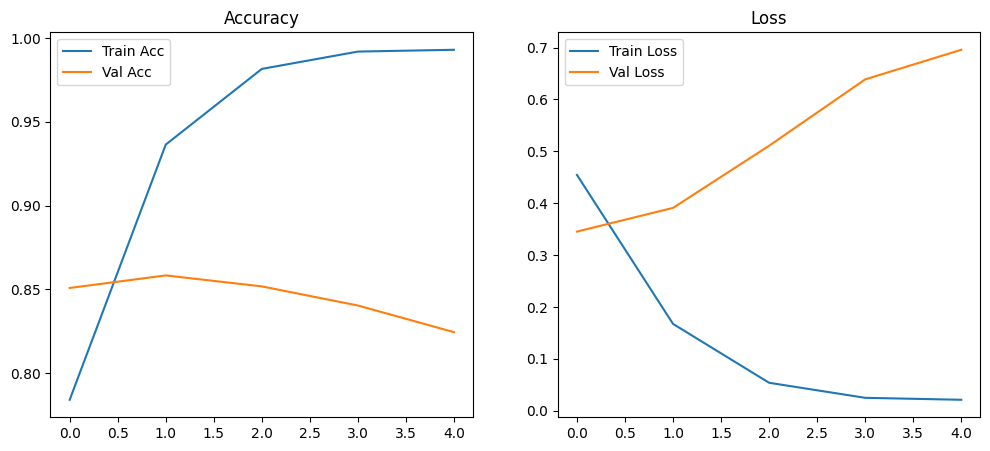

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(tf_history.history['accuracy'], label='Train Acc')
plt.plot(tf_history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(tf_history.history['loss'], label='Train Loss')
plt.plot(tf_history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

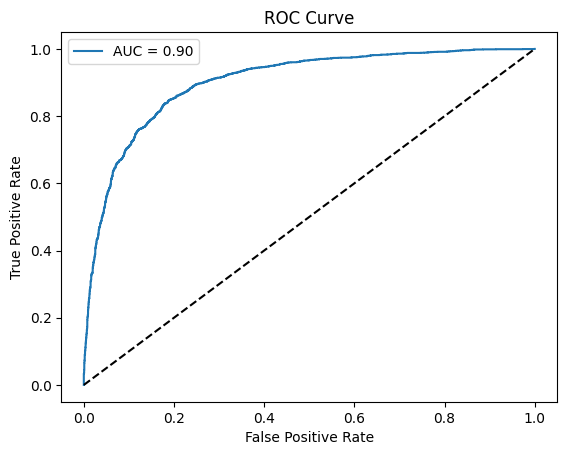

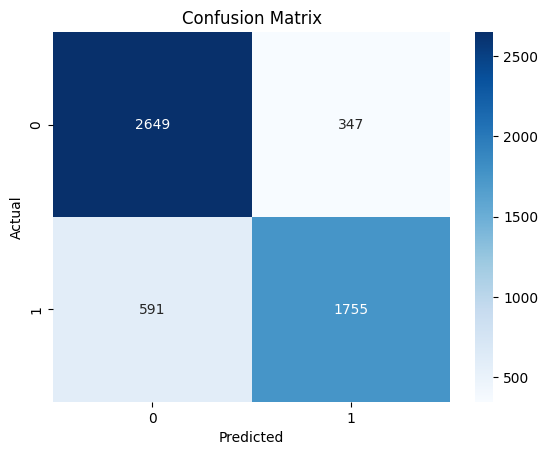

In [15]:
# ROC Curve
fpr, tpr, _ = roc_curve(tf_y_test, tf_y_pred_probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {tf_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(tf_y_test, tf_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [50]:
import json
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
with open('/content/DeteksiSarkasme.json', 'r') as f:
    py_data = [json.loads(line) for line in f]

py_texts = [item['headline'] for item in py_data]
py_labels = [item['is_sarcastic'] for item in py_data]

print("Distribusi Label:", Counter(py_labels))

Distribusi Label: Counter({0: 14985, 1: 11724})


In [52]:
py_tokenizer = Tokenizer(oov_token="<OOV>")
py_tokenizer.fit_on_texts(py_texts)
py_sequences = py_tokenizer.texts_to_sequences(py_texts)
py_padded = pad_sequences(py_sequences, maxlen=40, padding='post', truncating='post')

In [53]:
py_X_train, py_X_test, py_y_train, py_y_test = train_test_split(py_padded, py_labels, test_size=0.2, random_state=42)


In [43]:
from collections import Counter
print("Train:", Counter(py_y_train))
print("Test :", Counter(py_y_test))

Train: Counter({0: 11989, 1: 9378})
Test : Counter({0: 2996, 1: 2346})


In [54]:
class SarcasmDataset(Dataset):
    def __init__(self, data, labels):
        # Data berupa array (shape: [num_samples, sequence_length])
        self.data = torch.tensor(data, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

py_train_dataset = SarcasmDataset(py_X_train, py_y_train)
py_test_dataset = SarcasmDataset(py_X_test, py_y_test)

py_train_loader = DataLoader(py_train_dataset, batch_size=64, shuffle=True)
py_test_loader = DataLoader(py_test_dataset, batch_size=64)

In [55]:
class PyRNNImproved(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super(PyRNNImproved, self).__init__()
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        # Menggunakan RNN 2 layer, dengan dropout antar layer (dropout=0.3)
        self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True, num_layers=2, dropout=0.3)
        # Fully-connected layer 1 (dengan kapasitas yang lebih tinggi)
        self.fc1 = nn.Linear(hidden_dim, 128)
        # Gunakan dropout di fully connected layer
        self.dropout = nn.Dropout(0.5)
        # Fully-connected layer 2 untuk output
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        # x: [batch_size, seq_len]
        x = self.embedding(x)  # → [batch_size, seq_len, embed_dim]
        # output: [batch_size, seq_len, hidden_dim], h: [num_layers, batch_size, hidden_dim]
        _, h = self.rnn(x)
        # Ambil hidden state dari layer terakhir
        h_last = h[-1]  # [batch_size, hidden_dim]
        # Proses melalui layer fully-connected dengan aktivasi LeakyReLU
        x = F.leaky_relu(self.fc1(h_last))
        x = self.dropout(x)
        # Output melalui layer terakhir, gunakan sigmoid agar bernilai [0, 1]
        output = torch.sigmoid(self.fc2(x))
        return output.squeeze()

In [56]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vocab_size = len(py_tokenizer.word_index) + 1
py_model = PyRNNImproved(vocab_size=vocab_size, embed_dim=64, hidden_dim=128).to(device)

py_criterion = nn.BCELoss()
py_optimizer = optim.Adam(py_model.parameters(), lr=0.001)

num_epochs = 15  # Tambah jumlah epoch agar model mendapat waktu belajar yang cukup

for epoch in range(num_epochs):
    py_model.train()
    total_loss = 0.0
    for batch_X, batch_y in py_train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        py_optimizer.zero_grad()
        outputs = py_model(batch_X)
        loss = py_criterion(outputs, batch_y)
        loss.backward()
        py_optimizer.step()
        total_loss += loss.item()

    # Logging contoh prediksi dari batch pertama di epoch tersebut untuk monitor nilai output
    py_model.eval()
    with torch.no_grad():
        sample_batch, _ = next(iter(py_train_loader))
        sample_batch = sample_batch.to(device)
        sample_preds = py_model(sample_batch)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")
        print("Contoh prediksi batch pertama:", sample_preds[:10].detach().cpu().numpy())

Epoch 1/15, Loss: 230.3177
Contoh prediksi batch pertama: [0.44169697 0.44169697 0.44169697 0.44169697 0.44169697 0.44169697
 0.44169697 0.44169697 0.44169697 0.44169697]
Epoch 2/15, Loss: 229.7004
Contoh prediksi batch pertama: [0.44938025 0.44938025 0.44938025 0.44938025 0.44938025 0.44938025
 0.44938025 0.44938025 0.44938025 0.44938025]
Epoch 3/15, Loss: 229.6710
Contoh prediksi batch pertama: [0.43408012 0.43408012 0.43408012 0.43408012 0.43408012 0.43408012
 0.43408012 0.43408012 0.43408012 0.43408012]
Epoch 4/15, Loss: 229.2436
Contoh prediksi batch pertama: [0.44516173 0.44516173 0.44516173 0.44516173 0.44516173 0.44516173
 0.44516173 0.44516173 0.44516173 0.44516173]
Epoch 5/15, Loss: 229.1871
Contoh prediksi batch pertama: [0.42777354 0.42777354 0.42777354 0.42777354 0.42777354 0.42777354
 0.42777354 0.42777354 0.42777354 0.42777354]
Epoch 6/15, Loss: 229.0696
Contoh prediksi batch pertama: [0.4340639 0.4340639 0.4340639 0.4340639 0.4340639 0.4340639 0.4340639
 0.4340639 0.434

In [57]:
py_model.eval()
py_probs = []
py_preds = []
py_true = []

with torch.no_grad():
    for batch_X, batch_y in py_test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        probs = py_model(batch_X)
        preds = (probs > 0.5).int()
        py_probs.extend(probs.cpu().numpy())
        py_preds.extend(preds.cpu().numpy())
        py_true.extend(batch_y.cpu().numpy())

# Hitung metrik evaluasi
py_acc = accuracy_score(py_true, py_preds)
py_prec = precision_score(py_true, py_preds, zero_division=0)
py_rec = recall_score(py_true, py_preds, zero_division=0)
py_f1 = f1_score(py_true, py_preds, zero_division=0)
py_auc = roc_auc_score(py_true, py_probs)

print(f"[PyTorch Revisi] Accuracy: {py_acc:.4f}")
print(f"[PyTorch Revisi] Precision: {py_prec:.4f}")
print(f"[PyTorch Revisi] Recall: {py_rec:.4f}")
print(f"[PyTorch Revisi] F1 Score: {py_f1:.4f}")
print(f"[PyTorch Revisi] AUC: {py_auc:.4f}")

[PyTorch Revisi] Accuracy: 0.5608
[PyTorch Revisi] Precision: 0.0000
[PyTorch Revisi] Recall: 0.0000
[PyTorch Revisi] F1 Score: 0.0000
[PyTorch Revisi] AUC: 0.5000


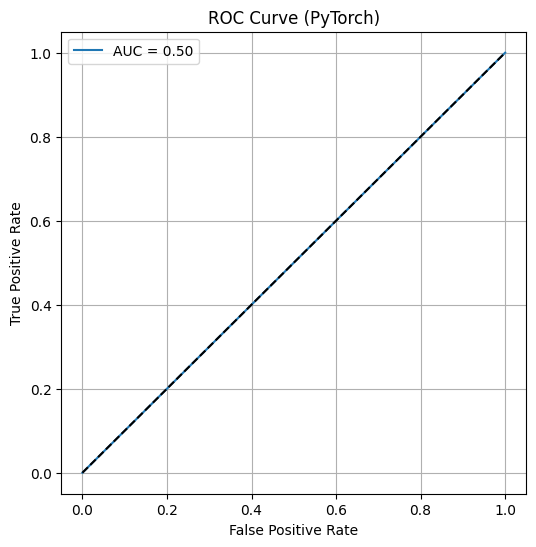

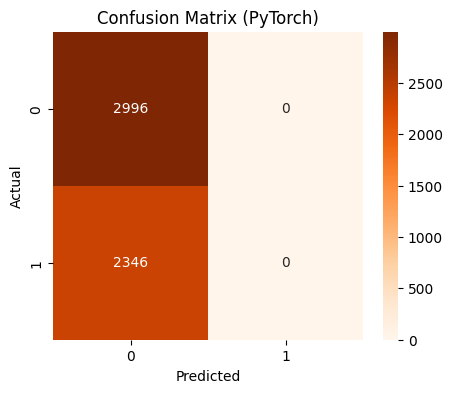

In [58]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(py_true, py_probs)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {py_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (PyTorch)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(py_true, py_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix (PyTorch)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [59]:
!pip install keras-tuner --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [60]:
import keras_tuner as kt
from tensorflow import keras

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=len(tf_tokenizer.word_index)+1,
                                     output_dim=hp.Choice('embedding_dim', [32, 64, 128]),
                                     input_length=40))

    model.add(keras.layers.SimpleRNN(
        units=hp.Int('rnn_units', min_value=32, max_value=128, step=32),
        return_sequences=False
    ))

    model.add(keras.layers.Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))

    model.add(keras.layers.Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [61]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='sarkasme_rnn'
)

# Callback agar training berhenti lebih awal jika tidak membaik
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

tuner.search(tf_X_train, tf_y_train,
             epochs=10,
             validation_data=(tf_X_test, tf_y_test),
             batch_size=64,
             callbacks=[early_stop])

Trial 10 Complete [00h 00m 43s]
val_accuracy: 0.8453762531280518

Best val_accuracy So Far: 0.8513665199279785
Total elapsed time: 00h 16m 45s


In [62]:
best_hp = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:")
print(f"Embedding dim: {best_hp.get('embedding_dim')}")
print(f"RNN units: {best_hp.get('rnn_units')}")
print(f"Dense units: {best_hp.get('dense_units')}")
print(f"Dropout rate: {best_hp.get('dropout_rate')}")
print(f"Learning rate: {best_hp.get('learning_rate')}")

# Build dan train ulang model terbaik
best_model = tuner.hypermodel.build(best_hp)
best_model.summary()

history = best_model.fit(tf_X_train, tf_y_train, epochs=10,
                         validation_data=(tf_X_test, tf_y_test),
                         batch_size=64,
                         callbacks=[early_stop])

Best Hyperparameters:
Embedding dim: 128
RNN units: 96
Dense units: 32
Dropout rate: 0.2
Learning rate: 0.0001


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.6327 - loss: 0.6272 - val_accuracy: 0.8173 - val_loss: 0.4219
Epoch 2/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 23s 68ms/step - accuracy: 0.8801 - loss: 0.3061 - val_accuracy: 0.8495 - val_loss: 0.3592
Epoch 3/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 43s 73ms/step - accuracy: 0.9469 - loss: 0.1566 - val_accuracy: 0.8480 - val_loss: 0.4004
Epoch 4/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - accuracy: 0.9751 - loss: 0.0821 - val_accuracy: 0.8428 - val_loss: 0.4677
Epoch 5/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - accuracy: 0.9886 - loss: 0.0432 - val_accuracy: 0.8375 - val_loss: 0.5733


In [63]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Akurasi Training: {train_acc * 100:.2f}%")
print(f"Akurasi Validasi: {val_acc * 100:.2f}%")

Akurasi Training: 98.80%
Akurasi Validasi: 83.75%


In [64]:
py_model.eval()
train_preds, train_true = [], []

with torch.no_grad():
    for batch_X, batch_y in py_train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = py_model(batch_X)
        preds = (outputs > 0.5).int()
        train_preds.extend(preds.cpu().numpy())
        train_true.extend(batch_y.cpu().numpy())

train_acc = accuracy_score(train_true, train_preds)
print(f"Akurasi Training (PyTorch): {train_acc:.4f}")

Akurasi Training (PyTorch): 0.5612
